In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import io

%matplotlib inline

import requests
import tweepy
import json

In [2]:
#!pip install tweepy
# Twitter API installed in (data) env

# 1. Data Gathering

In [2]:
# 1 dataset direct csv download  
twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
twitter.tweet_id.value_counts()

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
775085132600442880    1
774757898236878852    1
774639387460112384    1
774314403806253056    1
666020888022790149    1
Name: tweet_id, Length: 2356, dtype: int64

In [7]:
# 2. dataset - image predictions - gathered with request library
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content

In [8]:
image_predictions = pd.read_csv(io.StringIO(r.decode('utf-8')), sep="\s", engine='python')

In [9]:
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
#3. dataset usiong tweepy - twitter API - this is the setup(will be deleted for submission):

consumer_key = *********************************************
consumer_secret = *********************************************
access_token = *********************************************
access_secret = *********************************************

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


In [17]:
# 1 api call for overview:
id_of_tweet = 892420643555336193
tweet = api.get_status(id_of_tweet, tweet_mode='extended')._json
print(tweet)

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [14]:
# leading to misformatted json-string which is why this section will be changed for
tweet_dict = {}
missing = 0
available = 0
tweet_ids = twitter.tweet_id.tolist()
for i in tweet_ids:
    try:
        data = api.get_status(i, tweet_mode='extended')._json
        available += 1
        tweet_dict[i] = [data]
        
    except:
        print(f'tweet_id{i} misses tweet data')
        missing += 1   

tweet_id888202515573088257 misses tweet data
tweet_id877611172832227328 misses tweet data
tweet_id873697596434513921 misses tweet data
tweet_id872668790621863937 misses tweet data
tweet_id872261713294495745 misses tweet data
tweet_id869988702071779329 misses tweet data
tweet_id866816280283807744 misses tweet data
tweet_id861769973181624320 misses tweet data
tweet_id856602993587888130 misses tweet data
tweet_id856330835276025856 misses tweet data
tweet_id851953902622658560 misses tweet data
tweet_id851861385021730816 misses tweet data
tweet_id845459076796616705 misses tweet data
tweet_id844704788403113984 misses tweet data
tweet_id842892208864923648 misses tweet data
tweet_id837366284874571778 misses tweet data
tweet_id837012587749474308 misses tweet data
tweet_id829374341691346946 misses tweet data
tweet_id827228250799742977 misses tweet data
tweet_id812747805718642688 misses tweet data
tweet_id802247111496568832 misses tweet data
tweet_id779123168116150273 misses tweet data
tweet_id77

tweet_id742385895052087300 misses tweet data
tweet_id742161199639494656 misses tweet data
tweet_id742150209887731712 misses tweet data
tweet_id741793263812808706 misses tweet data
tweet_id741743634094141440 misses tweet data
tweet_id741438259667034112 misses tweet data
tweet_id741303864243200000 misses tweet data
tweet_id741099773336379392 misses tweet data
tweet_id741067306818797568 misses tweet data
tweet_id740995100998766593 misses tweet data
tweet_id740711788199743490 misses tweet data
tweet_id740699697422163968 misses tweet data
tweet_id740676976021798912 misses tweet data
tweet_id740373189193256964 misses tweet data
tweet_id740365076218183684 misses tweet data
tweet_id740359016048689152 misses tweet data
tweet_id740214038584557568 misses tweet data
tweet_id739979191639244800 misses tweet data
tweet_id739932936087216128 misses tweet data
tweet_id739844404073074688 misses tweet data
tweet_id739623569819336705 misses tweet data
tweet_id739606147276148736 misses tweet data
tweet_id73

tweet_id712097430750289920 misses tweet data
tweet_id712092745624633345 misses tweet data
tweet_id712085617388212225 misses tweet data
tweet_id712065007010385924 misses tweet data
tweet_id711998809858043904 misses tweet data
tweet_id711968124745228288 misses tweet data
tweet_id711743778164514816 misses tweet data
tweet_id711732680602345472 misses tweet data
tweet_id711694788429553666 misses tweet data
tweet_id711652651650457602 misses tweet data
tweet_id711363825979756544 misses tweet data
tweet_id711306686208872448 misses tweet data
tweet_id711008018775851008 misses tweet data
tweet_id710997087345876993 misses tweet data
tweet_id710844581445812225 misses tweet data
tweet_id710833117892898816 misses tweet data
tweet_id710658690886586372 misses tweet data
tweet_id710609963652087808 misses tweet data
tweet_id710588934686908417 misses tweet data
tweet_id710296729921429505 misses tweet data
tweet_id710283270106132480 misses tweet data
tweet_id710272297844797440 misses tweet data
tweet_id71

tweet_id698195409219559425 misses tweet data
tweet_id698178924120031232 misses tweet data
tweet_id697995514407682048 misses tweet data
tweet_id697990423684476929 misses tweet data
tweet_id697943111201378304 misses tweet data
tweet_id697881462549430272 misses tweet data
tweet_id697630435728322560 misses tweet data
tweet_id697616773278015490 misses tweet data
tweet_id697596423848730625 misses tweet data
tweet_id697575480820686848 misses tweet data
tweet_id697516214579523584 misses tweet data
tweet_id697482927769255936 misses tweet data
tweet_id697463031882764288 misses tweet data
tweet_id697270446429966336 misses tweet data
tweet_id697259378236399616 misses tweet data
tweet_id697255105972801536 misses tweet data
tweet_id697242256848379904 misses tweet data
tweet_id696900204696625153 misses tweet data
tweet_id696894894812565505 misses tweet data
tweet_id696886256886657024 misses tweet data
tweet_id696877980375769088 misses tweet data
tweet_id696754882863349760 misses tweet data
tweet_id69

tweet_id685906723014619143 misses tweet data
tweet_id685681090388975616 misses tweet data
tweet_id685667379192414208 misses tweet data
tweet_id685663452032069632 misses tweet data
tweet_id685641971164143616 misses tweet data
tweet_id685547936038666240 misses tweet data
tweet_id685532292383666176 misses tweet data
tweet_id685325112850124800 misses tweet data
tweet_id685321586178670592 misses tweet data
tweet_id685315239903100929 misses tweet data
tweet_id685307451701334016 misses tweet data
tweet_id685268753634967552 misses tweet data
tweet_id685198997565345792 misses tweet data
tweet_id685169283572338688 misses tweet data
tweet_id684969860808454144 misses tweet data
tweet_id684959798585110529 misses tweet data
tweet_id684940049151070208 misses tweet data
tweet_id684926975086034944 misses tweet data
tweet_id684914660081053696 misses tweet data
tweet_id684902183876321280 misses tweet data
tweet_id684880619965411328 misses tweet data
tweet_id684830982659280897 misses tweet data
tweet_id68

tweet_id677557565589463040 misses tweet data
tweet_id677547928504967168 misses tweet data
tweet_id677530072887205888 misses tweet data
tweet_id677335745548390400 misses tweet data
tweet_id677334615166730240 misses tweet data
tweet_id677331501395156992 misses tweet data
tweet_id677328882937298944 misses tweet data
tweet_id677314812125323265 misses tweet data
tweet_id677301033169788928 misses tweet data
tweet_id677269281705472000 misses tweet data
tweet_id677228873407442944 misses tweet data
tweet_id677187300187611136 misses tweet data
tweet_id676975532580409345 misses tweet data
tweet_id676957860086095872 misses tweet data
tweet_id676949632774234114 misses tweet data
tweet_id676948236477857792 misses tweet data
tweet_id676946864479084545 misses tweet data
tweet_id676942428000112642 misses tweet data
tweet_id676936541936185344 misses tweet data
tweet_id676916996760600576 misses tweet data
tweet_id676897532954456065 misses tweet data
tweet_id676864501615042560 misses tweet data
tweet_id67

tweet_id673270968295534593 misses tweet data
tweet_id673240798075449344 misses tweet data
tweet_id673213039743795200 misses tweet data
tweet_id673148804208660480 misses tweet data
tweet_id672997845381865473 misses tweet data
tweet_id672995267319328768 misses tweet data
tweet_id672988786805112832 misses tweet data
tweet_id672984142909456390 misses tweet data
tweet_id672980819271634944 misses tweet data
tweet_id672975131468300288 misses tweet data
tweet_id672970152493887488 misses tweet data
tweet_id672968025906282496 misses tweet data
tweet_id672964561327235073 misses tweet data
tweet_id672902681409806336 misses tweet data
tweet_id672898206762672129 misses tweet data
tweet_id672884426393653248 misses tweet data
tweet_id672877615439593473 misses tweet data
tweet_id672834301050937345 misses tweet data
tweet_id672828477930868736 misses tweet data
tweet_id672640509974827008 misses tweet data
tweet_id672622327801233409 misses tweet data
tweet_id672614745925664768 misses tweet data
tweet_id67

tweet_id669603084620980224 misses tweet data
tweet_id669597912108789760 misses tweet data
tweet_id669583744538451968 misses tweet data
tweet_id669573570759163904 misses tweet data
tweet_id669571471778410496 misses tweet data
tweet_id669567591774625800 misses tweet data
tweet_id669564461267722241 misses tweet data
tweet_id669393256313184256 misses tweet data
tweet_id669375718304980992 misses tweet data
tweet_id669371483794317312 misses tweet data
tweet_id669367896104181761 misses tweet data
tweet_id669363888236994561 misses tweet data
tweet_id669359674819481600 misses tweet data
tweet_id669354382627049472 misses tweet data
tweet_id669353438988365824 misses tweet data
tweet_id669351434509529089 misses tweet data
tweet_id669328503091937280 misses tweet data
tweet_id669327207240699904 misses tweet data
tweet_id669324657376567296 misses tweet data
tweet_id669216679721873412 misses tweet data
tweet_id669214165781868544 misses tweet data
tweet_id669203728096960512 misses tweet data
tweet_id66

tweet_id666104133288665088 misses tweet data
tweet_id666102155909144576 misses tweet data
tweet_id666099513787052032 misses tweet data
tweet_id666094000022159362 misses tweet data
tweet_id666082916733198337 misses tweet data
tweet_id666073100786774016 misses tweet data
tweet_id666071193221509120 misses tweet data
tweet_id666063827256086533 misses tweet data
tweet_id666058600524156928 misses tweet data
tweet_id666057090499244032 misses tweet data
tweet_id666055525042405380 misses tweet data
tweet_id666051853826850816 misses tweet data
tweet_id666050758794694657 misses tweet data
tweet_id666049248165822465 misses tweet data
tweet_id666044226329800704 misses tweet data
tweet_id666033412701032449 misses tweet data
tweet_id666029285002620928 misses tweet data
tweet_id666020888022790149 misses tweet data
Number missing tweet data1484
Number available tweet data872


In [23]:
print(f'Number missing tweet data: {missing}')
print(f'Number available tweet data: {available}')

Number missing tweet data: 1484
Number available tweet data: 872


In [21]:
# Write txt file from tweet_dict - note: a more concise way would have been to use json.dump
with open('tweet_json.txt', 'w') as f:
    for value in tweet_dict.values():
        f.write('{}\n'.format(value[0]))

In [37]:
# read into a pandas dataframe line by line:
with open('tweet_json.txt') as f:
    lines = [line for line in f]

tweet_list = []

for line in lines:
    tweet_id = line 
    
    
    

In [455]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
tweet_ids = twitter.tweet_id.tolist()

In [24]:
# Correct version to save json-string
tweet_ids = twitter.tweet_id.tolist()
missing = 0
available = 0
missing_list = []
count = 0
with open('tweet_json.txt', 'w') as outfile:
    for i in tweet_ids:
        count += 1
        print(str(count) + ": " + str(f'id: {i}'))
        try:
            data = api.get_status(i, tweet_mode='extended')._json
            json.dump(data, outfile)
            outfile.write('\n')
            print('Success')
            available += 1
            
        
        except:
            print(f'tweet_id {i} misses tweet data')
            missing += 1
            missing_list.append(i)
        

1: id: 892420643555336193
Success
2: id: 892177421306343426
Success
3: id: 891815181378084864
Success
4: id: 891689557279858688
Success
5: id: 891327558926688256
Success
6: id: 891087950875897856
Success
7: id: 890971913173991426
Success
8: id: 890729181411237888
Success
9: id: 890609185150312448
Success
10: id: 890240255349198849
Success
11: id: 890006608113172480
Success
12: id: 889880896479866881
Success
13: id: 889665388333682689
Success
14: id: 889638837579907072
Success
15: id: 889531135344209921
Success
16: id: 889278841981685760
Success
17: id: 888917238123831296
Success
18: id: 888804989199671297
Success
19: id: 888554962724278272
Success
20: id: 888202515573088257
tweet_id 888202515573088257 misses tweet data
21: id: 888078434458587136
Success
22: id: 887705289381826560
Success
23: id: 887517139158093824
Success
24: id: 887473957103951883
Success
25: id: 887343217045368832
Success
26: id: 887101392804085760
Success
27: id: 886983233522544640
Success
28: id: 886736880519319552

Success
220: id: 850145622816686080
Success
221: id: 850019790995546112
Success
222: id: 849776966551130114
Success
223: id: 849668094696017920
Success
224: id: 849412302885593088
Success
225: id: 849336543269576704
Success
226: id: 849051919805034497
Success
227: id: 848690551926992896
Success
228: id: 848324959059550208
Success
229: id: 848213670039564288
Success
230: id: 848212111729840128
Success
231: id: 847978865427394560
Success
232: id: 847971574464610304
Success
233: id: 847962785489326080
Success
234: id: 847842811428974592
Success
235: id: 847617282490613760
Success
236: id: 847606175596138505
Success
237: id: 847251039262605312
Success
238: id: 847157206088847362
Success
239: id: 847116187444137987
Success
240: id: 846874817362120707
Success
241: id: 846514051647705089
Success
242: id: 846505985330044928
Success
243: id: 846153765933735936
Success
244: id: 846139713627017216
Success
245: id: 846042936437604353
Success
246: id: 845812042753855489
Success
247: id: 84567794397

Success
441: id: 819924195358416896
Success
442: id: 819711362133872643
Success
443: id: 819588359383371776
Success
444: id: 819347104292290561
Success
445: id: 819238181065359361
Success
446: id: 819227688460238848
Success
447: id: 819015337530290176
Success
448: id: 819015331746349057
Success
449: id: 819006400881917954
Success
450: id: 819004803107983360
Success
451: id: 818646164899774465
Success
452: id: 818627210458333184
Success
453: id: 818614493328580609
Success
454: id: 818588835076603904
Success
455: id: 818536468981415936
Success
456: id: 818307523543449600
Success
457: id: 818259473185828864
Success
458: id: 818145370475810820
Success
459: id: 817908911860748288
Success
460: id: 817827839487737858
Success
461: id: 817777686764523521
Success
462: id: 817536400337801217
Success
463: id: 817502432452313088
Success
464: id: 817423860136083457
Success
465: id: 817415592588222464
Success
466: id: 817181837579653120
Success
467: id: 817171292965273600
Success
468: id: 81712097034

Success
667: id: 790581949425475584
Success
668: id: 790337589677002753
Success
669: id: 790277117346975746
Success
670: id: 790227638568808452
Success
671: id: 789986466051088384
Success
672: id: 789960241177853952
Success
673: id: 789903600034189313
Success
674: id: 789628658055020548
Success
675: id: 789599242079838210
Success
676: id: 789530877013393408
Success
677: id: 789314372632018944
Success
678: id: 789280767834746880
Success
679: id: 789268448748703744
Success
680: id: 789137962068021249
Success
681: id: 788908386943430656
Success
682: id: 788765914992902144
Success
683: id: 788552643979468800
Success
684: id: 788412144018661376
Success
685: id: 788178268662984705
Success
686: id: 788150585577050112
Success
687: id: 788070120937619456
Success
688: id: 788039637453406209
Success
689: id: 787810552592695296
Success
690: id: 787717603741622272
Success
691: id: 787397959788929025
Success
692: id: 787322443945877504
Success
693: id: 787111942498508800
Success
694: id: 78696306437

Success
890: id: 759793422261743616
Success
891: id: 759566828574212096
tweet_id 759566828574212096 misses tweet data
892: id: 759557299618865152
Success
893: id: 759447681597108224
tweet_id 759447681597108224 misses tweet data
894: id: 759446261539934208
tweet_id 759446261539934208 misses tweet data
895: id: 759197388317847553
tweet_id 759197388317847553 misses tweet data
896: id: 759159934323924993
tweet_id 759159934323924993 misses tweet data
897: id: 759099523532779520
tweet_id 759099523532779520 misses tweet data
898: id: 759047813560868866
tweet_id 759047813560868866 misses tweet data
899: id: 758854675097526272
tweet_id 758854675097526272 misses tweet data
900: id: 758828659922702336
tweet_id 758828659922702336 misses tweet data
901: id: 758740312047005698
tweet_id 758740312047005698 misses tweet data
902: id: 758474966123810816
tweet_id 758474966123810816 misses tweet data
903: id: 758467244762497024
tweet_id 758467244762497024 misses tweet data
904: id: 758405701903519748
twee

tweet_id 747933425676525569 misses tweet data
1003: id: 747885874273214464
tweet_id 747885874273214464 misses tweet data
1004: id: 747844099428986880
tweet_id 747844099428986880 misses tweet data
1005: id: 747816857231626240
tweet_id 747816857231626240 misses tweet data
1006: id: 747651430853525504
tweet_id 747651430853525504 misses tweet data
1007: id: 747648653817413632
tweet_id 747648653817413632 misses tweet data
1008: id: 747600769478692864
tweet_id 747600769478692864 misses tweet data
1009: id: 747594051852075008
tweet_id 747594051852075008 misses tweet data
1010: id: 747512671126323200
tweet_id 747512671126323200 misses tweet data
1011: id: 747461612269887489
tweet_id 747461612269887489 misses tweet data
1012: id: 747439450712596480
tweet_id 747439450712596480 misses tweet data
1013: id: 747242308580548608
tweet_id 747242308580548608 misses tweet data
1014: id: 747219827526344708
tweet_id 747219827526344708 misses tweet data
1015: id: 747204161125646336
tweet_id 7472041611256463

tweet_id 733460102733135873 misses tweet data
1114: id: 733109485275860992
tweet_id 733109485275860992 misses tweet data
1115: id: 732732193018155009
tweet_id 732732193018155009 misses tweet data
1116: id: 732726085725589504
tweet_id 732726085725589504 misses tweet data
1117: id: 732585889486888962
tweet_id 732585889486888962 misses tweet data
1118: id: 732375214819057664
tweet_id 732375214819057664 misses tweet data
1119: id: 732005617171337216
tweet_id 732005617171337216 misses tweet data
1120: id: 731285275100512256
tweet_id 731285275100512256 misses tweet data
1121: id: 731156023742988288
tweet_id 731156023742988288 misses tweet data
1122: id: 730924654643314689
tweet_id 730924654643314689 misses tweet data
1123: id: 730573383004487680
tweet_id 730573383004487680 misses tweet data
1124: id: 730427201120833536
tweet_id 730427201120833536 misses tweet data
1125: id: 730211855403241472
tweet_id 730211855403241472 misses tweet data
1126: id: 730196704625098752
tweet_id 7301967046250987

tweet_id 714258258790387713 misses tweet data
1224: id: 714251586676113411
tweet_id 714251586676113411 misses tweet data
1225: id: 714214115368108032
tweet_id 714214115368108032 misses tweet data
1226: id: 714141408463036416
tweet_id 714141408463036416 misses tweet data
1227: id: 713919462244790272
tweet_id 713919462244790272 misses tweet data
1228: id: 713909862279876608
tweet_id 713909862279876608 misses tweet data
1229: id: 713900603437621249
tweet_id 713900603437621249 misses tweet data
1230: id: 713761197720473600
tweet_id 713761197720473600 misses tweet data
1231: id: 713411074226274305
tweet_id 713411074226274305 misses tweet data
1232: id: 713177543487135744
tweet_id 713177543487135744 misses tweet data
1233: id: 713175907180089344
tweet_id 713175907180089344 misses tweet data
1234: id: 712809025985978368
tweet_id 712809025985978368 misses tweet data
1235: id: 712717840512598017
tweet_id 712717840512598017 misses tweet data
1236: id: 712668654853337088
tweet_id 7126686548533370

tweet_id 705442520700944385 misses tweet data
1335: id: 705428427625635840
tweet_id 705428427625635840 misses tweet data
1336: id: 705239209544720384
tweet_id 705239209544720384 misses tweet data
1337: id: 705223444686888960
tweet_id 705223444686888960 misses tweet data
1338: id: 705102439679201280
tweet_id 705102439679201280 misses tweet data
1339: id: 705066031337840642
tweet_id 705066031337840642 misses tweet data
1340: id: 704871453724954624
tweet_id 704871453724954624 misses tweet data
1341: id: 704859558691414016
tweet_id 704859558691414016 misses tweet data
1342: id: 704847917308362754
tweet_id 704847917308362754 misses tweet data
1343: id: 704819833553219584
tweet_id 704819833553219584 misses tweet data
1344: id: 704761120771465216
tweet_id 704761120771465216 misses tweet data
1345: id: 704499785726889984
tweet_id 704499785726889984 misses tweet data
1346: id: 704491224099647488
tweet_id 704491224099647488 misses tweet data
1347: id: 704480331685040129
tweet_id 7044803316850401

tweet_id 696744641916489729 misses tweet data
1445: id: 696713835009417216
tweet_id 696713835009417216 misses tweet data
1446: id: 696518437233913856
tweet_id 696518437233913856 misses tweet data
1447: id: 696490539101908992
tweet_id 696490539101908992 misses tweet data
1448: id: 696488710901260288
tweet_id 696488710901260288 misses tweet data
1449: id: 696405997980676096
tweet_id 696405997980676096 misses tweet data
1450: id: 696100768806522880
tweet_id 696100768806522880 misses tweet data
1451: id: 695816827381944320
tweet_id 695816827381944320 misses tweet data
1452: id: 695794761660297217
tweet_id 695794761660297217 misses tweet data
1453: id: 695767669421768709
tweet_id 695767669421768709 misses tweet data
1454: id: 695629776980148225
tweet_id 695629776980148225 misses tweet data
1455: id: 695446424020918272
tweet_id 695446424020918272 misses tweet data
1456: id: 695409464418041856
tweet_id 695409464418041856 misses tweet data
1457: id: 695314793360662529
tweet_id 6953147933606625

tweet_id 688898160958271489 misses tweet data
1556: id: 688894073864884227
tweet_id 688894073864884227 misses tweet data
1557: id: 688828561667567616
tweet_id 688828561667567616 misses tweet data
1558: id: 688804835492233216
tweet_id 688804835492233216 misses tweet data
1559: id: 688789766343622656
tweet_id 688789766343622656 misses tweet data
1560: id: 688547210804498433
tweet_id 688547210804498433 misses tweet data
1561: id: 688519176466644993
tweet_id 688519176466644993 misses tweet data
1562: id: 688385280030670848
tweet_id 688385280030670848 misses tweet data
1563: id: 688211956440801280
tweet_id 688211956440801280 misses tweet data
1564: id: 688179443353796608
tweet_id 688179443353796608 misses tweet data
1565: id: 688116655151435777
tweet_id 688116655151435777 misses tweet data
1566: id: 688064179421470721
tweet_id 688064179421470721 misses tweet data
1567: id: 687841446767013888
tweet_id 687841446767013888 misses tweet data
1568: id: 687826841265172480
tweet_id 6878268412651724

tweet_id 682750546109968385 misses tweet data
1667: id: 682697186228989953
tweet_id 682697186228989953 misses tweet data
1668: id: 682662431982772225
tweet_id 682662431982772225 misses tweet data
1669: id: 682638830361513985
tweet_id 682638830361513985 misses tweet data
1670: id: 682429480204398592
tweet_id 682429480204398592 misses tweet data
1671: id: 682406705142087680
tweet_id 682406705142087680 misses tweet data
1672: id: 682393905736888321
tweet_id 682393905736888321 misses tweet data
1673: id: 682389078323662849
tweet_id 682389078323662849 misses tweet data
1674: id: 682303737705140231
tweet_id 682303737705140231 misses tweet data
1675: id: 682259524040966145
tweet_id 682259524040966145 misses tweet data
1676: id: 682242692827447297
tweet_id 682242692827447297 misses tweet data
1677: id: 682088079302213632
tweet_id 682088079302213632 misses tweet data
1678: id: 682059653698686977
tweet_id 682059653698686977 misses tweet data
1679: id: 682047327939461121
tweet_id 6820473279394611

tweet_id 677961670166224897 misses tweet data
1778: id: 677918531514703872
tweet_id 677918531514703872 misses tweet data
1779: id: 677895101218201600
tweet_id 677895101218201600 misses tweet data
1780: id: 677716515794329600
tweet_id 677716515794329600 misses tweet data
1781: id: 677700003327029250
Success
1782: id: 677698403548192770
Success
1783: id: 677687604918272002
Success
1784: id: 677673981332312066
Success
1785: id: 677662372920729601
Success
1786: id: 677644091929329666
Success
1787: id: 677573743309385728
Success
1788: id: 677565715327688705
Success
1789: id: 677557565589463040
Success
1790: id: 677547928504967168
Success
1791: id: 677530072887205888
Success
1792: id: 677335745548390400
Success
1793: id: 677334615166730240
Success
1794: id: 677331501395156992
Success
1795: id: 677328882937298944
Success
1796: id: 677314812125323265
Success
1797: id: 677301033169788928
Success
1798: id: 677269281705472000
Success
1799: id: 677228873407442944
Success
1800: id: 6771873001876111

Success
1996: id: 672594978741354496
Success
1997: id: 672591762242805761
Success
1998: id: 672591271085670400
Success
1999: id: 672538107540070400
Success
2000: id: 672523490734551040
Success
2001: id: 672488522314567680
Success
2002: id: 672482722825261057
Success
2003: id: 672481316919734272
Success
2004: id: 672475084225949696
Success
2005: id: 672466075045466113
Success
2006: id: 672272411274932228
Success
2007: id: 672267570918129665
Success
2008: id: 672264251789176834
Success
2009: id: 672256522047614977
Success
2010: id: 672254177670729728
Success
2011: id: 672248013293752320
Success
2012: id: 672245253877968896
Success
2013: id: 672239279297454080
Success
2014: id: 672231046314901505
Success
2015: id: 672222792075620352
Success
2016: id: 672205392827572224
Success
2017: id: 672169685991993344
Success
2018: id: 672160042234327040
Success
2019: id: 672139350159835138
Success
2020: id: 672125275208069120
Success
2021: id: 672095186491711488
Success
2022: id: 672082170312290304
S

Success
2218: id: 668528771708952576
Success
2219: id: 668507509523615744
Success
2220: id: 668496999348633600
Success
2221: id: 668484198282485761
Success
2222: id: 668480044826800133
Success
2223: id: 668466899341221888
Success
2224: id: 668297328638447616
Success
2225: id: 668291999406125056
Success
2226: id: 668286279830867968
Success
2227: id: 668274247790391296
Success
2228: id: 668268907921326080
Success
2229: id: 668256321989451776
Success
2230: id: 668248472370458624
Success
2231: id: 668237644992782336
Success
2232: id: 668226093875376128
Success
2233: id: 668221241640230912
Success
2234: id: 668204964695683073
Success
2235: id: 668190681446379520
Success
2236: id: 668171859951755264
Success
2237: id: 668154635664932864
Success
2238: id: 668142349051129856
Success
2239: id: 668113020489474048
Success
2240: id: 667937095915278337
Success
2241: id: 667924896115245057
Success
2242: id: 667915453470232577
Success
2243: id: 667911425562669056
Success
2244: id: 667902449697558528
S

In [25]:
print(f'Number missing tweet data: {missing}')
print(f'Number available tweet data: {available}')

Number missing tweet data: 916
Number available tweet data: 1440


In [27]:
with open('tweet_json.txt') as f:
    lines = [line for line in f]

tweet_list = []

for line in lines:
    line1 =json.loads(line)
    tweet_id = line1['id']
    retweet_count = line1['retweet_count']
    favorite_count = line1['favorite_count']
    
    tweet_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})

In [28]:
tweet_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [454]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6943,33451
1,892177421306343426,5245,28993
2,891815181378084864,3456,21815
3,891689557279858688,7161,36499
4,891327558926688256,7685,34920


# 2. Assessing Data

#### Rubric requires to identify 8 Quality Issues and 2 Tidiness Issues

Further rails:
- only original ratings that have images
- rating numerators are greater than denominators does not need to be cleaned
- no need to gather tweets beyond 2017 - because image predictions are not accessible beyond this date

In [34]:
# Show all rows for visual assessment
pd.set_option('display.max_rows', None)

In [453]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [36]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [37]:
twitter.shape[0]

2356

In [56]:
# First programmatic tests to see wether the denominator is 10 at in all rows:

twitter.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [58]:
# As shown below there are several rating far below 10, which may be a quality issue, since this DogRating thing is about good karma and good vibes, it is unlikely someones dog would be rated e.g. as a 0 or 2,
# With further investigation I may decide to add a 1 infront of these numbers later on
twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [74]:
# Check how many dognames are not added to the dataframe
# and wether it is a small enough number to find these
# and add them manually, so that they can be used for further analysis
# RESULT: Number is too large, it does not make sense to get the names, but work with the ID exclusively
twitter.query("name == 'None'").shape[0]

745

In [77]:
# Check how many Dogtionary classifications are missing
# RESULT: Too many are missing to manually create the missing
twitter.query("doggo == floofer == pupper == puppo == 'None'").shape[0]
# However will  compress the dog_stages into 1 column to see wether out of the remaining columns any insights can be drawn - tidiness

1976

In [81]:
# check for duplicates
twitter.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [469]:
image_predictions.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [39]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [96]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [40]:
image_predictions.shape[0]

2075

In [93]:
image_predictions.duplicated().sum()

0

In [44]:
tweet_df.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6943,33451
1,892177421306343426,5245,28993
2,891815181378084864,3456,21815
3,891689557279858688,7161,36499
4,891327558926688256,7685,34920
5,891087950875897856,2574,17602
6,890971913173991426,1639,10253
7,890729181411237888,15628,56295
8,890609185150312448,3594,24237
9,890240255349198849,6045,27643


In [42]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1440 non-null   int64
 1   retweet_count   1440 non-null   int64
 2   favorite_count  1440 non-null   int64
dtypes: int64(3)
memory usage: 33.9 KB


In [43]:
tweet_df.shape[0]

1440

In [85]:
# check tweet_df for duplicates
tweet_df.tweet_id.duplicated().sum()

0

In [452]:
twitter.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1762,678643457146150913,NaN,NaN,2015-12-20 18:29:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizz. He just arrived. Couldn't wait unt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678643457...,10,10,Grizz,None,None,None,None
465,817181837579653120,NaN,NaN,2017-01-06 01:31:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a pupper with squeaky hi...,8.159661e+17,4.196984e+09,2017-01-02 17:00:46 +0000,https://twitter.com/dog_rates/status/815966073...,13,10,None,None,None,pupper,None
957,751538714308972544,NaN,NaN,2016-07-08 22:09:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Max. She has one ear that's always sli...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751538714...,10,10,Max,None,None,None,None


## Documentation Quality Issues

**1. Issue:** _Completeness_: Before dropping retweet related columns, these columns will be used to delete retweet rows, so that these rows will not falsify results of the analyis 

**2. Issue:** _Completeness_: Dropping columns in original tweet data which are not helpful in analysis and which are missing too many datapoints, these include: 

- in_reply_to_status_id	
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
<br />

**3. Issue:** _Completeness_: Because we only want original tweets that have image data considered, we will perform a **right-join** When merging the original tweet dataset with the prediction dataframe - step is considered missing data quality cleaning, since rows will be deleted which miss image data.<br />
**4. Issue:** _Completeness_: There are many images of other animals than dogs in the dataset, as well as of images of other common objects, I decided to computationally filter, waging between a large enough remaining dataset, and a relatively clean dataset by query-masking for a combination of predictions and prediction confidences of **topk(2)** <br />

**5. Issue:** _Accuracy_: As analyzed above, the dog_stages have a lot of missing stages, so the missing stages will be replaced by the generic stage "**floofer**", as defined in [The dogtionary](https://video.udacity-data.com/topher/2017/October/59e04ceb_dogtionary-combined/dogtionary-combined.png) - this will be done after melting for tidiness <br /> 

**6. Issue:** Validity_: Wrong rating denominator, must be 10 in each row in this dataset, while rating nominator can be above 10 as a feature of this twitter community.<br />
**7. Issue:** _Validity_: Rating_numerator far below 10 like is an error as this feel-good twitter community would not dismiss some persons dogs as unlikable, options woue be to either add +10 to numbers far below 10, like e.g. 1 or 3, or conventionally set these values to the dataset mean, likely opting for the latter.<br />
**8. Issue:** _Consistency_: modify the prediction names to ```.lower().strip()```, and replace "-" with whitespace<br />
**9. Issue:** <br /> Will manually delete an unqualified rows

## Documentation Tidiness Issues
**1. Issue:** In original tweet dataframe the timestamp column in not datetime, so this column is to be converted<br />
**2. Issue:** tweet_id in all datasets is categorical and will be converted to non-null object type (string)<br />
**3. Issue:** In original tweet dataframe will melt dog_stages into 1 column<br />
**4. Issue:** Rating_numerator and rating_denominator should be float<br />
**5. Issue:** Calculate a total score for visualization between numerator and denominator after cleaning <br />
**7. Issue:** Calculate the length of each value in the 'text' column for analysis later
**8. Issue:** For now I consider all dataframes as 1 observational unit, hence I will merge them into 1 dataframe<br />
img_num in predictions what datatype?<br />


# Checkpoint for reloading data
Excluding imports from first code cell


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import io

%matplotlib inline

import requests
import tweepy
import json

In [2]:
# 1. original tweet dataset direct csv download  
twitter = pd.read_csv('twitter-archive-enhanced.csv') 
# 2. dataset - image predictions - gathered with request library
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content
image_predictions = pd.read_csv(io.StringIO(r.decode('utf-8')), sep="\s", engine='python')
# 3. dataset - retweet and favorite count
with open('tweet_json.txt') as f:
    lines = [line for line in f]

tweet_list = []

for line in lines:
    line1 =json.loads(line)
    tweet_id = line1['id']
    retweet_count = line1['retweet_count']
    favorite_count = line1['favorite_count']
    
    tweet_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})

tweet_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

# Cleaning data

In [3]:
# Creating copies of all 3 dataframes for cleaning further assessment:
twitter_clean = twitter.copy()
image_predictions_clean = image_predictions.copy()
tweet_df_clean = tweet_df.copy()

## 1. Quality Cleaning - Completeness

## Define Issue 1:
To deleted rows of retweets the retweet_status columns will be used with boolean masking of isnull() rows for the rows which are no retweets

In [9]:
# Issue demo
twitter_clean.text.str.contains('RT @').value_counts()

False    2175
True      181
Name: text, dtype: int64

In [10]:
# code
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull()]
twitter_clean = twitter_clean[twitter_clean.retweeted_status_user_id.isnull()]
twitter_clean = twitter_clean[twitter_clean.retweeted_status_timestamp.isnull()]

In [11]:
# test
twitter_clean.text.str.contains('RT @').value_counts()

False    2175
Name: text, dtype: int64

### Define Issue 2.
For dropping unhelpful and incomplete data columns from the original tweet dataset pandas.drop() will be used 

In [12]:
# Code
twitter_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_timestamp','retweeted_status_id','retweeted_status_user_id'], axis=1, inplace=True)

In [13]:
# Test → columns are dropped and absent of dataframe
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Define Issue 3.
The project instructions require to only consider tweets with an image so this step towards the master dataframe will already **merge()** the original tweet dataframe with the image_prediction dataframe, while performing a **right-join** to only have the rows that have images added

In [14]:
# code
twitter_clean_image = pd.merge(twitter_clean, image_predictions_clean, how='right', on='tweet_id', sort=False, ) 

In [15]:
# test - number of rows of "twitter_clean_image" must be the same as of "image_predictions_clean"
twitter_clean_image.shape[0] == image_predictions_clean.shape[0]

True

### Define Issue 4.
The neural networks image prediction is useful to filter out images of other animals or objects, it must be waged between a clean enough dataset and a still a large enough dataset in regards to numbers, code below take a reasonablequery and shows numbers of rows, the boolean predictions and confidences are considered.

In [16]:
twitter_clean_image = twitter_clean_image.query("(p1_dog == True and p1_conf > 0.3) or (p2_dog == True and p2_conf > 0.2)")

In [17]:
#test
twitter_clean_image.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1079,717841801130979328,2016-04-06 22:29:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Barclay. His father was a banana. 11/1...,https://twitter.com/dog_rates/status/717841801...,11.0,10.0,Barclay,None,None,...,1,Brittany_spaniel,0.922876,True,English_springer,0.070113,True,bath_towel,0.002561,False


# 1. Tidiness Cleaning

### Define Issue 1.
Converting timestamp column of first merged dataset to datetime with pandas datatime functionality

In [18]:
# code
twitter_clean_image.timestamp = pd.to_datetime(twitter_clean_image.timestamp)

In [19]:
# test
twitter_clean_image.timestamp.info()

<class 'pandas.core.series.Series'>
Int64Index: 1370 entries, 0 to 2073
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
1317 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 21.4 KB


### Define Tidiness Issue 2.
Converting tweet_id column in remaining 2 datasets to non-null object as there is not arithmetic functionality for it.

In [20]:
# code
twitter_clean_image.tweet_id = twitter_clean_image.tweet_id.astype(str)
tweet_df_clean.tweet_id = tweet_df_clean.tweet_id.astype(str)

In [21]:
# test
twitter_clean_image.tweet_id.info(), tweet_df_clean.tweet_id.info();

<class 'pandas.core.series.Series'>
Int64Index: 1370 entries, 0 to 2073
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
1370 non-null   object
dtypes: object(1)
memory usage: 21.4+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 1440 entries, 0 to 1439
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
1440 non-null   object
dtypes: object(1)
memory usage: 11.4+ KB


### Define Tidiness Issue 3. + Quality Issue 5.
Melting dog stages into 1 column that will be named 'dog_stages'. I realised that it will be best to first perform the _validity_ Quality issues with exchange complete none dog stages to the generic "floofer" whereafter melting will performed followed by masking to exclude the "None"-value rows.

In [22]:
# masking actual floofer to change None to floofer in floofer column
mask = (twitter_clean_image['doggo'] == 'None') & (twitter_clean_image['floofer'] == 'None') & (twitter_clean_image['pupper'] == 'None') & (twitter_clean_image['puppo'] == 'None')
twitter_clean_image.loc[mask, 'floofer'] = 'floofer'

In [23]:
# test 
twitter_clean_image.floofer.value_counts()

floofer    1110
None        207
Name: floofer, dtype: int64

In [24]:
# now in the next step the columns can just be melted or stacked to 1 column that will be named dog_stages,
# whereafter all rows with "None"- values in dog_stages can simply be dropped.

#easiest way to create id_vars for melt
id_vars = twitter_clean_image.columns.values.tolist()
[id_vars.remove(i) for i in ['doggo', 'floofer','pupper','puppo']]

# melt and mask
twitter_clean_image = twitter_clean_image.melt(id_vars=id_vars , value_vars=['doggo', 'floofer','pupper','puppo'], value_name='dog_stages', ignore_index=True)
twitter_clean_image = twitter_clean_image[twitter_clean_image['dog_stages']!= 'None']

# drop variable column
twitter_clean_image.drop('variable', axis=1, inplace=True)

In [25]:
# tests
twitter_clean_image.dog_stages.value_counts()

floofer    1110
pupper      144
doggo        53
puppo        20
Name: dog_stages, dtype: int64

In [26]:
twitter_clean_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 642 to 5469
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1539 non-null   object             
 1   timestamp           1327 non-null   datetime64[ns, UTC]
 2   source              1327 non-null   object             
 3   text                1327 non-null   object             
 4   expanded_urls       1327 non-null   object             
 5   rating_numerator    1327 non-null   float64            
 6   rating_denominator  1327 non-null   float64            
 7   name                1327 non-null   object             
 8   jpg_url             1539 non-null   object             
 9   img_num             1539 non-null   int64              
 10  p1                  1539 non-null   object             
 11  p1_conf             1539 non-null   float64            
 12  p1_dog              1539 non-nul

### Define Tidiness Issue 4.
Changing rating denominator and numerator columns to float

In [27]:
# code 
twitter_clean_image.rating_denominator = twitter_clean_image.rating_denominator.astype(float)
twitter_clean_image.rating_numerator = twitter_clean_image.rating_numerator.astype(float)

In [28]:
#test
twitter_clean_image[['rating_denominator','rating_numerator']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 642 to 5469
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating_denominator  1327 non-null   float64
 1   rating_numerator    1327 non-null   float64
dtypes: float64(2)
memory usage: 36.1 KB


## 2. Quality Cleaning

### Define Quality Issue 6.
The rating denominator must be 10 in each row, will be changed with basic pandas functionality

In [29]:
# code
twitter_clean_image.rating_denominator = 10.0

In [30]:
#test
twitter_clean_image.rating_denominator.value_counts()

10.0    1539
Name: rating_denominator, dtype: int64

### Define Quality Issue 7.
The rating numerator scores have errors in it as the there should not be any bad ratings for any individuals dogs, above where 2 approaches discussed on how to correct these values, I decided to average out all ratings and apply this average to all dog ratings below **8**

In [31]:
# code 
# getting the average 
avg = twitter_clean_image.rating_numerator.mean()
# modify
twitter_clean_image.loc[twitter_clean_image.rating_numerator <= 7, 'rating_numerator'] = avg

In [32]:
#test
twitter_clean_image.rating_numerator.min()

8.0

### Define Quality Issue 8.
Prediction names are supposed to be formatted in cases these would want to be compared to lists of dognames species, also these will be easier to read

In [33]:
#code
def dog_species(x):
    x = x.str.strip()
    x = x.str.lower()
    x = x.str.replace("_"," ")
    return x

twitter_clean_image[['p1','p2','p3']] = twitter_clean_image[['p1','p2','p3']].apply(lambda x:dog_species(x))

In [34]:
#test
twitter_clean_image[['p1','p2','p3']].sample(10)

,p1,p2,p3
5215,norwegian elkhound,chesapeake bay retriever,malamute
2922,pug,french bulldog,norwegian elkhound
1875,labrador retriever,american staffordshire terrier,dalmatian
2589,samoyed,chow,white wolf
5204,dishwasher,golden retriever,chow
2062,german shepherd,doberman,basenji
1543,labrador retriever,golden retriever,seat belt
2640,pembroke,cardigan,basenji
2722,pembroke,rhodesian ridgeback,beagle
1644,english springer,welsh springer spaniel,cocker spaniel


### Define Quality Issue 9.
After manually going through rows and cleaned predictions, I decided to delete 2 rows of toy poodles, as these wher not real dogs: https://pbs.twimg.com/media/CkR0jrhWYAALL5N.jpg and https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg

In [35]:
twitter_clean_image[['jpg_url','p1','p2','p3']].sample(100)

,jpg_url,p1,p2,p3
2002,https://pbs.twimg.com/media/CemIBt4WwAQqhVV.jpg,soft-coated wheaten terrier,bedlington terrier,great pyrenees
1518,https://pbs.twimg.com/media/CU9HyzSWIAAVcte.jpg,pekinese,persian cat,japanese spaniel
1507,https://pbs.twimg.com/media/CU8AwZ_UsAA-Lbu.jpg,keeshond,norwegian elkhound,cairn
1672,https://pbs.twimg.com/ext_tw_video_thumb/67695...,labrador retriever,beagle,golden retriever
1569,https://pbs.twimg.com/media/CVbodBOUsAAb7jZ.jpg,car mirror,basset,beagle
...,...,...,...,...
2698,https://pbs.twimg.com/media/DD-40X3WAAAJPU5.jpg,pembroke,chihuahua,cardigan
2089,https://pbs.twimg.com/media/Cj1I1fbWYAAOwff.jpg,vizsla,rhodesian ridgeback,chesapeake bay retriever
3162,https://pbs.twimg.com/media/CYkON6CVAAAPXAc.jpg,labrador retriever,chesapeake bay retriever,german short-haired pointer
3241,https://pbs.twimg.com/media/Ca5cPrJXIAImHtD.jpg,shetland sheepdog,collie,pembroke


In [36]:
twitter_clean_image.drop([2099,2159], inplace=True)

In [37]:
#test
twitter_clean_image.shape[0]

1537

## 2. Tidiness Cleaning

### Define Tidiness Issue 5.
A total score to calculate between numerator and denominator


In [38]:
#code
twitter_clean_image['total_score'] = twitter_clean_image.rating_numerator / twitter_clean_image.rating_denominator *100
twitter_clean_image.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

In [39]:
#test
twitter_clean_image['total_score'].head()

642    110.0
661    100.0
676    110.0
685    130.0
700    120.0
Name: total_score, dtype: float64

### Define Tidiness Issue 6.
Merge to master dataframe, because we only want to consider **tweets with images**, and because we want to be able to analyise retweet count and favorite later on, we will do an **inner join**, as a right or outer join would result in uninsightful rows, although the inner join may render the dataset relatively small.

In [40]:
# code
twitter_clean_image = twitter_clean_image.merge(tweet_df_clean, how='inner', on='tweet_id')

In [41]:
#tests
twitter_clean_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        983 non-null    object             
 1   timestamp       803 non-null    datetime64[ns, UTC]
 2   source          803 non-null    object             
 3   text            803 non-null    object             
 4   expanded_urls   803 non-null    object             
 5   name            803 non-null    object             
 6   jpg_url         983 non-null    object             
 7   img_num         983 non-null    int64              
 8   p1              983 non-null    object             
 9   p1_conf         983 non-null    float64            
 10  p1_dog          983 non-null    bool               
 11  p2              983 non-null    object             
 12  p2_conf         983 non-null    float64            
 13  p2_dog          983 non-null    boo

### Define Tidiness Issue 7.
For later analysis calculate the length of each rows text

In [42]:
# code
twitter_clean_image['text_length'] = twitter_clean_image.text.str.len()

In [43]:
# test
twitter_clean_image.text_length.sample(3)

973    130.0
810    162.0
16       NaN
Name: text_length, dtype: float64

## Additional Iteration for Quality Issues
After viewing and thinking about the subsequent analysis of the master dataframe, I decided to deleted further columns which are not insightful for further analysis, these columns include 'source', 'expanded_urls', and 'name', the latter due to the following reasons: 
1. the data is incomplete,
2. the indentifier is the tweet-id
3. dog_stages is an alternatively level of classification

In [44]:
# code
twitter_clean_image.drop(['source', 'expanded_urls','name'], axis=1, inplace=True)

In [45]:
#test
twitter_clean_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        983 non-null    object             
 1   timestamp       803 non-null    datetime64[ns, UTC]
 2   text            803 non-null    object             
 3   jpg_url         983 non-null    object             
 4   img_num         983 non-null    int64              
 5   p1              983 non-null    object             
 6   p1_conf         983 non-null    float64            
 7   p1_dog          983 non-null    bool               
 8   p2              983 non-null    object             
 9   p2_conf         983 non-null    float64            
 10  p2_dog          983 non-null    bool               
 11  p3              983 non-null    object             
 12  p3_conf         983 non-null    float64            
 13  p3_dog          983 non-null    boo

### Saving Master Dataframe to csv

In [46]:
twitter_clean_image.to_csv('twitter_archive_master.csv', index=False)

# Analysis
This is a shortened section of the project, it is only asked for 3 insights and 1 labeled visualization
Further the analysis is to be documented.

Potential insights that are interesting:

- which dog stages get the highest scores or favorite count?
- does a higher number of images result in a higher scores or favorite count?
- does a longer text result in a a higher scores or favorite count?


I decided to visualize the first

In [47]:
# Generic function built for general plotting of groupby parameters
def myGroPlot(df, grpVar, yVar='total_score', color='steelblue', figsize=(14,6), alpha=0.7):
    '''base function for groupby plotting of dependent variables to no_show column'''
    # plotting
    df.groupby([grpVar])[yVar].mean().plot.bar(edgecolor='black', figsize=figsize, rot=0, width=0.6, color=color, alpha=alpha)
    grpVar=grpVar.replace("_"," ")
    yVar=yVar.replace("_"," ")
    plt.title(f'{yVar} by {grpVar}'.title(), fontsize = 14, weight = "bold")
    plt.xlabel(grpVar.title(), fontsize =10, weight = "bold")
    plt.ylabel(f'{yVar}'.title(), fontsize = 8, weight='bold')
    plt.grid(axis='y')
    
    # saving figure for act_report
    plt.savefig(f"{grpVar + '-' + yVar}")

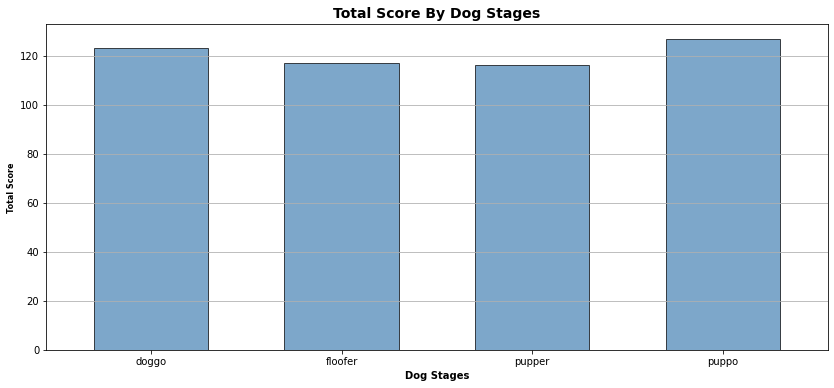

In [48]:
#Plot 1
# which dog stages get the highest scores?
myGroPlot(twitter_clean_image, 'dog_stages')

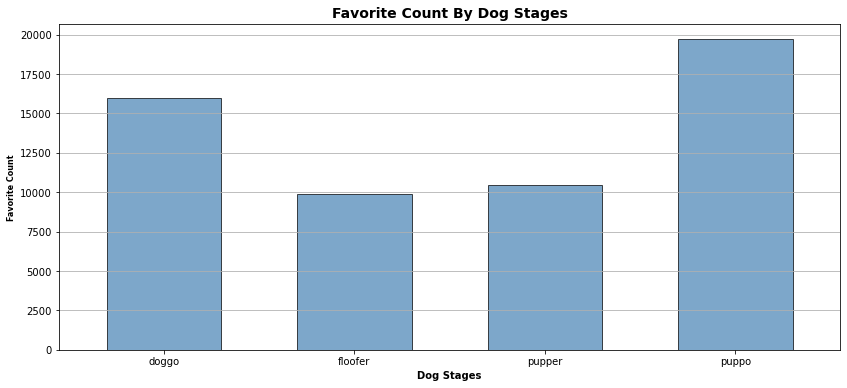

In [49]:
#Plot 2
# which dog stages get the highest favorite count?
myGroPlot(twitter_clean_image, 'dog_stages', yVar = 'favorite_count')

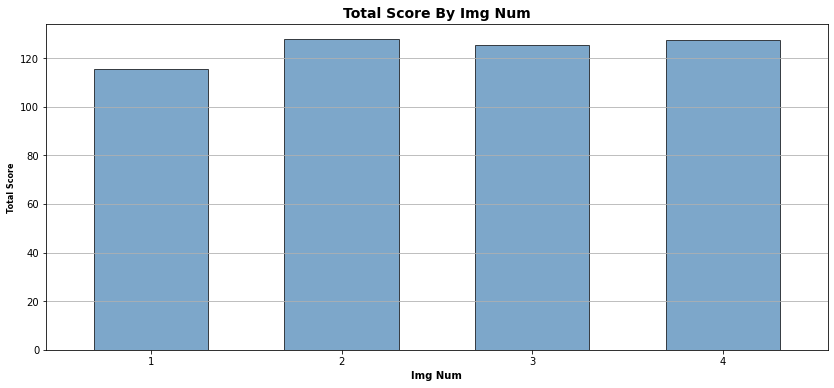

In [50]:
#Plot 3
# which image_numbers get the highest favorite count?
myGroPlot(twitter_clean_image, 'img_num')

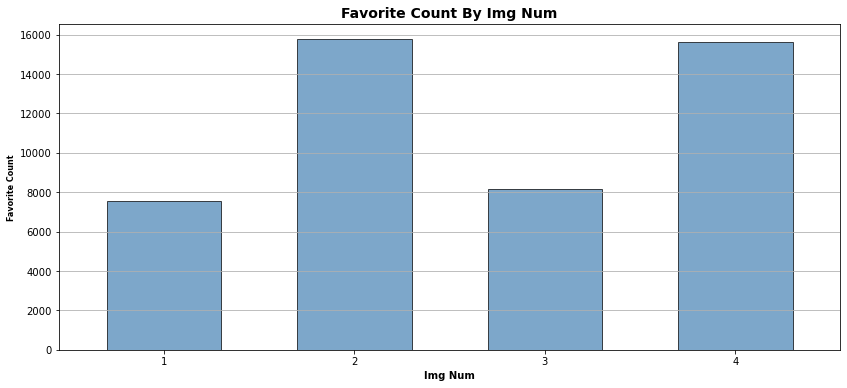

In [51]:
#Plot 4
# which image_numbers get the highest favorite count?
myGroPlot(twitter_clean_image, 'img_num',yVar = 'favorite_count')

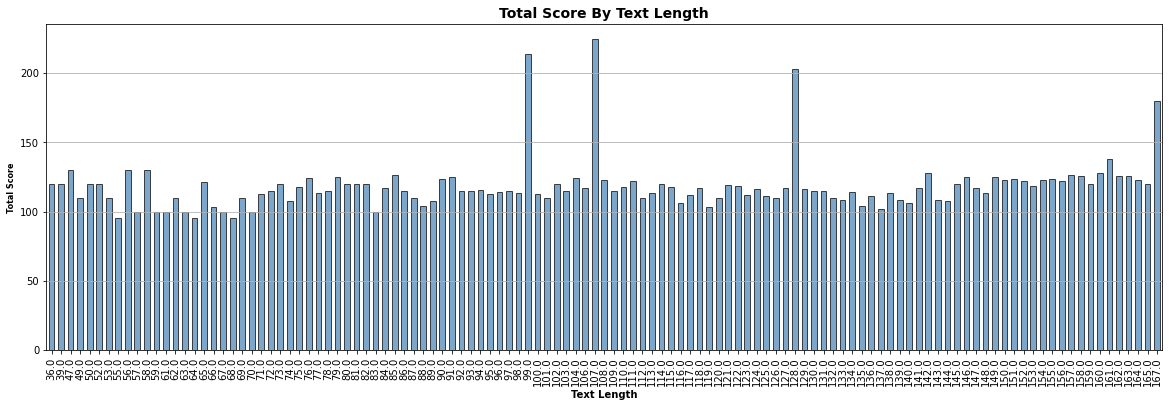

In [52]:
#Plot 5
#does a longer text result in higher scores?
myGroPlot(twitter_clean_image, 'text_length', figsize=(20,6))
plt.xticks(rotation = 90);

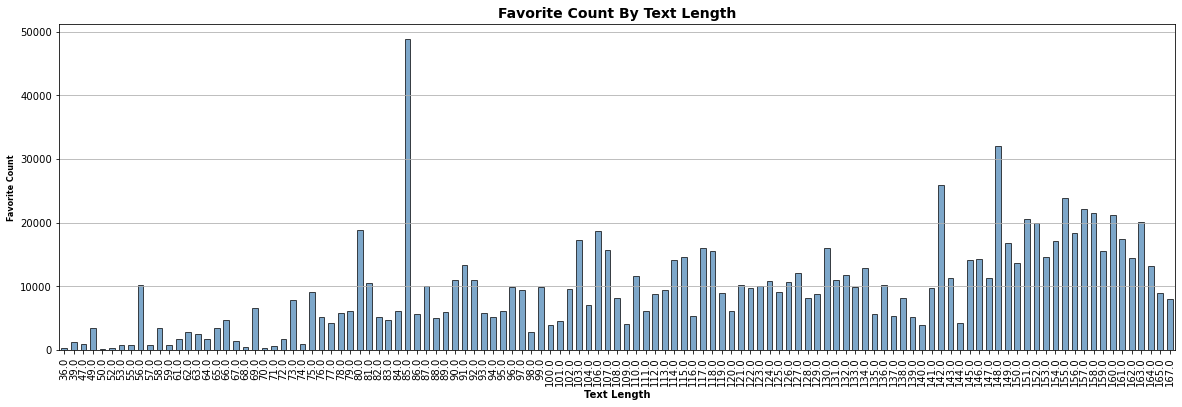

In [53]:
#Plot 6
# does a longer text result in a higher favorite count?
myGroPlot(twitter_clean_image, 'text_length', yVar = 'favorite_count',figsize=(20,6))
plt.xticks(rotation = 90);